In [3]:
#Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Step 2: Load and Examine the Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
# Step 3: Normalize the Pixel Values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [6]:
# Step 4: Build the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


/home/devika/Desktop/DataScience_Lab/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-29 01:37:40.401284: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Step 5: Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
# Step 6: Train the Model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4681 - loss: 1.4820 - val_accuracy: 0.5504 - val_loss: 1.2570
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6076 - loss: 1.1258 - val_accuracy: 0.5986 - val_loss: 1.1576
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6548 - loss: 0.9880 - val_accuracy: 0.6586 - val_loss: 0.9905
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6860 - loss: 0.9008 - val_accuracy: 0.6800 - val_loss: 0.9211
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7092 - loss: 0.8312 - val_accuracy: 0.6862 - val_loss: 0.9206
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7313 - loss: 0.7675 - val_accuracy: 0.6924 - val_loss: 0.9089
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7511 - loss: 0.7151 - val_accuracy: 0.6908 - val_loss: 0.8994
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7645 - loss: 0

In [9]:
# Step 7: Evaluate the Model on Test Data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("✅ Test accuracy:", accuracy)


✅ Test accuracy: 0.6940000057220459


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


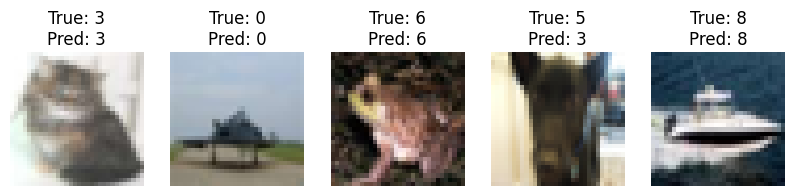

In [10]:
# Step 8: Predict on Random Images
# Pick 5 random test images
random_indices = np.random.choice(len(x_test), 5)
random_images = x_test[random_indices]
true_labels = y_test[random_indices]

# Predict classes
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

# Show images with labels
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(random_images[i])
    plt.title(f"True: {true_labels[i][0]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()


In [11]:
# Step 9: Improved Model (Experiment)
model_exp = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_exp.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_exp.summary()

history_exp = model_exp.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

loss_exp, acc_exp = model_exp.evaluate(x_test, y_test, verbose=0)
print("✅ Improved model test accuracy:", acc_exp)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,658 (2.55 MB)

 Trainable params: 667,274 (2.55 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 34ms/step - accuracy: 0.3652 - loss: 1.7654 - val_accuracy: 0.5310 - val_loss: 1.3103
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.4894 - loss: 1.4272 - val_accuracy: 0.5342 - val_loss: 1.3831
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 46s 33ms/step - accuracy: 0.5541 - loss: 1.2609 - val_accuracy: 0.5266 - val_loss: 1.3872
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.5988 - loss: 1.1468 - val_accuracy: 0.6332 - val_loss: 1.0932
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.6344 - loss: 1.0555 - val_accuracy: 0.6282 - val_loss: 1.0899
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.6650 - loss: 0.9672 - val_accuracy: 0.6506 - val_loss: 1.0288
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.6886 - loss: 0.8978 - val_accuracy: 0.5908 - val_loss: 1.3908
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.7098 -

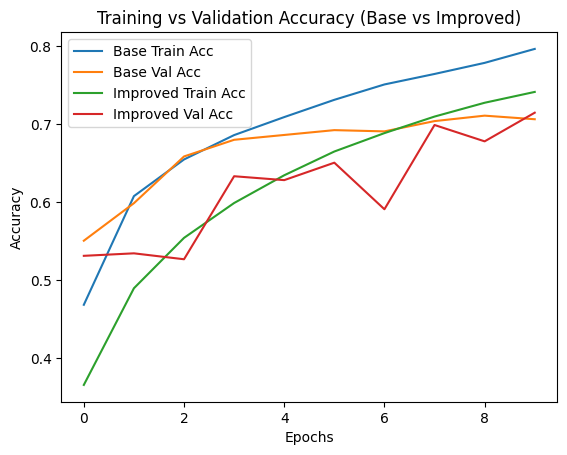

In [12]:
plt.plot(history.history['accuracy'], label='Base Train Acc')
plt.plot(history.history['val_accuracy'], label='Base Val Acc')
plt.plot(history_exp.history['accuracy'], label='Improved Train Acc')
plt.plot(history_exp.history['val_accuracy'], label='Improved Val Acc')
plt.title("Training vs Validation Accuracy (Base vs Improved)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
